# Import Library

Proses NLP :
- EDA
- Pembersihan (Hapus tanda baca, ubah ke lowercase)
- Tokenisasi
- Penghapusan stopwords
- Stemming atau Lemmatization
- Vektorisasi teks (misalnya, TF-IDF, BoW)
- Pembagian data (Training, Validation, Test)
- Pembangunan dan pelatihan model

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [28]:
df = pd.read_csv("all_data_resep.csv")
df.head()

,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam


In [29]:
# Duplicated Check
print("Duplicated : ", df.duplicated().sum())
print("\nMissing Values:")
df.isna().sum()

Duplicated :  642

Missing Values:


Title          0
Ingredients    0
Steps          0
Loves          0
URL            0
dtype: int64

In [30]:
# Drop Column URL
df = df.drop(columns=['URL'])

In [31]:
# Statistic descriptive for data numeric
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistic descriptive for data text
print("\nStatistic Data Text:")
print(df[['Title', 'Ingredients', 'Steps']].describe(include=[object]))



Statistik Deskriptif:
              Loves
count  15593.000000
mean      11.779901
std       21.549629
min        0.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      939.000000

Statistic Data Text:
                   Title                                        Ingredients  \
count              15593                                              15593   
unique             12468                                              14940   
top     Tongseng Kambing  1 papan tempe, potong kubus--5 buah tahu putih...   
freq                  55                                                  3   

                                                    Steps  
count                                               15593  
unique                                              14940  
top     Tumis bumbu halus, masukan salam, jahe, dan le...  
freq                                                    3  


In [32]:
duplicates = df[df.duplicated()]
duplicates

,Title,Ingredients,Steps,Loves
5324,Ayam goreng super duper simple,"Ayam, bisa diganti ati ampela/daging kambing--...",Cuci bersih ayam--Rebus ayam dengan asem dan g...,7
5326,Gulai ayam arya,Bahan halus;--5 ekor Ayam--5 bulat Bawang puti...,Bersihkan ayam potong sesuai selera. Setelah a...,9
5329,Gurame Bakar,1 ekor gurame (sy pakai berat 700 gr)--Bumbu h...,"Cuci bersih ikan, lalu belah punggung,dan saya...",12
5802,Pare ayam daging sapi,2 buah pare ayam--200 gr daging sapi (potong d...,"Potong agak tebal pare lalu taburi garam,remas...",3
5875,Iga sapi & ayam bakar madu,1/2 kg iga sapi--1/2 ayam (bagian paha potong ...,Cuci bersih iga & ayam--Rebus daging sapi meng...,8
...,...,...,...,...
15077,Telur balado kentang + udang,1/4 telur (rebus)--1/4 kentang (pot kotak gore...,"Rebus telur hingga matang,, kentang kupas (gor...",6
15105,Sambal lado telur puyu terong udang,10 btih telur puyu--semper empat udang--1 buah...,Rebus telur puyuh kups sisikn--Berdikn udang d...,11
15186,Rolade Telur Udang Saus Asam Manis,2 butir telur--1/2 batang wortel--2-3 batang d...,"Campur telur, daun bawang, serta wortel yg sud...",5
15203,Udang bungkus telur,1/4 udang--5 butir telur--1/6 kol--daun bawang...,Dadar telur secukupnya untuk bungkus--Oseng ba...,13


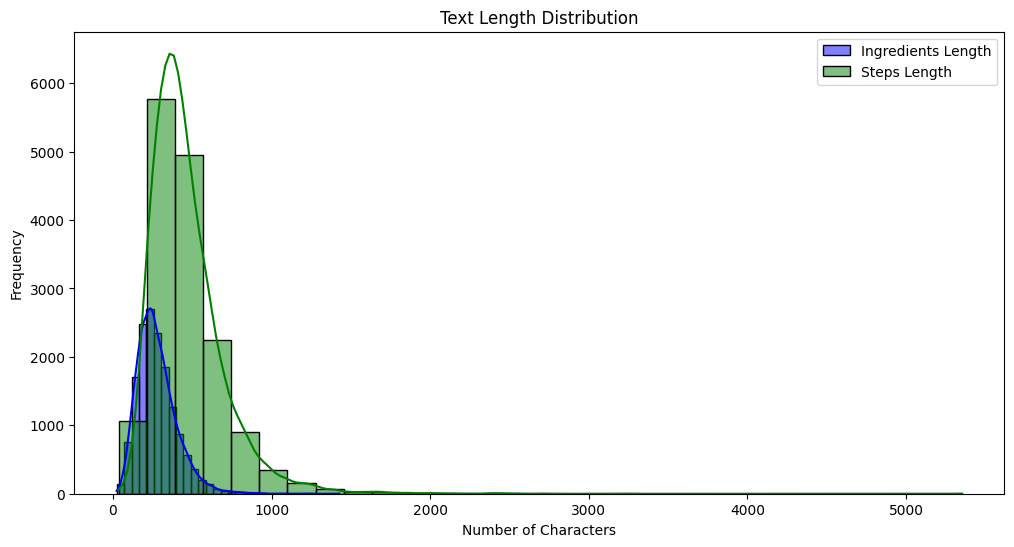

In [33]:
# Distribution of text length in the Ingredients column
df['Ingredients_length'] = df['Ingredients'].apply(lambda x: len(str(x)))
df['Steps_length'] = df['Steps'].apply(lambda x: len(str(x)))

# Visualization of text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Ingredients_length'], kde=True, bins=30, color='blue', label='Ingredients Length')
sns.histplot(df['Steps_length'], kde=True, bins=30, color='green', label='Steps Length')
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [34]:
# Analysis of the distribution of 'Loves' values
print("\nDistribution Loves Value:")
print(df['Loves'].value_counts())


Distribution Loves Value:
Loves
6      1513
5      1319
3      1317
4      1304
7      1211
       ... 
171       1
145       1
195       1
99        1
109       1
Name: count, Length: 185, dtype: int64


# Preprocessing Data

In [35]:
import re
import string
import nltk

Changce Column Title, Ingredients and Steps to lower text

In [36]:
def clean_emoji(text):
  if text is not None and isinstance(text, str):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Ingredients'] = df['Ingredients'].apply(lambda x: clean_emoji(x))
df['Title'] = df['Title'].apply(lambda x: clean_emoji(x))
df['Steps'] = df['Steps'].apply(lambda x: clean_emoji(x))
df.head(1)

,Title,Ingredients,Steps,Loves,Ingredients_length,Steps_length
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,271,1127


In [37]:
def clean_lower(lower_text):
  lower_text = lower_text.lower()
  return lower_text
df['Title'] = df['Title'].apply(clean_lower)
df['Ingredients'] = df['Ingredients'].apply(clean_lower)
df['Steps'] = df['Steps'].apply(clean_lower)
df

,Title,Ingredients,Steps,Loves,Ingredients_length,Steps_length
0,ayam woku manado,1 ekor ayam kampung (potong 12)--2 buah jeruk ...,cuci bersih ayam dan tiriskan. lalu peras jeru...,1,271,1127
1,ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"haluskan bumbu2nya (baput, ketumbar, kemiri, k...",1,324,651
2,ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,panaskan minyak di dalam wajan. setelah minyak...,2,208,420
3,ayam geprek,250 gr daging ayam (saya pakai fillet)--secuku...,goreng ayam seperti ayam krispi--ulek semua ba...,10,223,180
4,minyak ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,cuci bersih kulit ayam. sisihkan--ambil 50 ml ...,4,139,597
...,...,...,...,...,...,...
15588,udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"bersihkan udang, siapkan bahan bahan--tumis ba...",46,293,372
15589,jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,tumis bawang merah bawang putih hingga harum.-...,6,289,254
15590,tumis udang tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"tiriskan bawang putih, bawang merah dan cabe l...",3,176,327
15591,tumis kacang panjang terong udang,"stgah ikat kacang panjang,ku bli 3ribu d psr--...","potong2 kacang panjang,terong cuci bersih sisi...",12,259,303


In [38]:
# Gabung kolom Title, Ingredients, dan Steps menjadi 1
df["combine_text"] = df["Title"] + ' ' + df["Ingredients"] + ' ' + df["Steps"]

Remove Punctuation

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Santi
[nltk_data]     Susanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Santi
[nltk_data]     Susanti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Santi
[nltk_data]     Susanti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Remove Punctuation with regex
import re
df['combine_text'] = df['Ingredients'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

Stopwords Removal

In [41]:
df.head()

,Title,Ingredients,Steps,Loves,Ingredients_length,Steps_length,combine_text
0,ayam woku manado,1 ekor ayam kampung (potong 12)--2 buah jeruk ...,cuci bersih ayam dan tiriskan. lalu peras jeru...,1,271,1127,1 ekor ayam kampung potong 122 buah jeruk nipi...
1,ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"haluskan bumbu2nya (baput, ketumbar, kemiri, k...",1,324,651,1 kg ayam dipotong sesuai selera jangan kecil2...
2,ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,panaskan minyak di dalam wajan. setelah minyak...,2,208,420,14 kg ayam3 buah cabai hijau besar7 buah cabai...
3,ayam geprek,250 gr daging ayam (saya pakai fillet)--secuku...,goreng ayam seperti ayam krispi--ulek semua ba...,10,223,180,250 gr daging ayam saya pakai filletsecukupnya...
4,minyak ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,cuci bersih kulit ayam. sisihkan--ambil 50 ml ...,4,139,597,400 gr kulit ayam lemaknya8 siung bawang puti...


In [42]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('Indonesian'))
df['combine_text'] = df['combine_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming / Lemmatization Text

In [43]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

df['Ingredients'] = df['Ingredients'].apply(stemming_text)
df['Steps'] = df['Steps'].apply(stemming_text)

Tokenization and Padding

In [44]:
VOCAB_SIZE = 10000
PADDING_TYPE = 'post'
EMBEDDING_DIM = 16
MAX_LENGTH = 120

print(tf.__version__)

2.16.0-rc0


In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

# Tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['combine_text'])

# Ubah teks menjadi urutan angka dengan menggunakan padding
sequence = tokenizer.texts_to_sequences(df['combine_text'])
padded_sequence = tf.keras.utils.pad_sequences(sequence, padding=PADDING_TYPE)

# Embedding
embedding = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM)
embedded_vector = embedding(padded_sequence)

In [46]:
print("Tokenized Sequences:")
for i, seq in enumerate(sequence[:2]): 
    print(f"Sample {i+1}: {seq}")


Tokenized Sequences:
Sample 1: [21, 2, 6, 13, 20, 10, 2, 3, 22, 3, 12, 2, 13, 3, 12, 15, 4, 5, 9, 2, 15, 20, 14, 20, 5, 9, 2, 21, 24, 24, 2, 11, 4, 3, 16, 2, 25, 6, 10, 4, 13, 2, 5, 7, 15, 7, 8, 24, 2, 8, 18, 12, 2, 9, 3, 10, 3, 12, 28, 2, 10, 4, 3, 8, 2, 13, 4, 5, 22, 7, 14, 31, 2, 11, 3, 23, 3, 5, 9, 2, 12, 6, 10, 3, 16, 31, 2, 11, 3, 23, 3, 5, 9, 2, 15, 4, 14, 7, 16, 21, 26, 2, 19, 3, 11, 6, 2, 12, 6, 10, 3, 16, 21, 26, 2, 19, 3, 11, 6, 2, 10, 3, 23, 7, 14, 2, 12, 6, 10, 3, 16, 2, 8, 6, 8, 4, 3, 7, 2, 8, 6, 17, 6, 10, 3, 28, 2, 11, 4, 14, 7, 10, 2, 13, 6, 12, 7, 10, 7, 24, 2, 11, 3, 14, 3, 5, 9, 2, 8, 6, 10, 6, 16, 24, 2, 17, 6, 12, 11, 3, 10, 2, 18, 3, 4, 5, 2, 8, 3, 17, 3, 12, 24, 2, 7, 13, 3, 14, 2, 18, 3, 4, 5, 2, 13, 6, 12, 3, 5, 9, 7, 15, 6, 5, 22, 6, 18, 3, 15, 2, 10, 3, 8, 3, 21, 2, 21, 24, 2, 9, 6, 17, 3, 8, 2, 3, 7, 10]
Sample 2: [21, 2, 13, 9, 2, 3, 22, 3, 12, 2, 18, 7, 15, 20, 14, 20, 5, 9, 2, 8, 6, 8, 4, 3, 7, 2, 8, 6, 17, 6, 10, 3, 2, 25, 3, 5, 9, 3, 5, 2, 13, 6, 19, 7

In [47]:
print("\nPadded Sequences:")
for i, seq in enumerate(padded_sequence[:2]):  
    print(f"Sample {i+1}: {seq}")



Padded Sequences:
Sample 1: [21  2  6 ...  0  0  0]
Sample 2: [21  2 13 ...  0  0  0]


In [48]:
print("\nEmbedded Vectors:")
for i in range(2):  
    print(f"Sample {i+1}:")
    print(embedded_vector[i].numpy())  



Embedded Vectors:
Sample 1:
[[-0.02091953  0.00246167 -0.0390998  ...  0.03048309  0.01515369
   0.01336319]
 [ 0.04557637 -0.03528116 -0.0395238  ...  0.03713722  0.03535007
   0.00056446]
 [ 0.0310126  -0.00615199  0.0158737  ... -0.0435845   0.01531993
   0.04081586]
 ...
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04141457
   0.03909277]
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04141457
   0.03909277]
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04141457
   0.03909277]]
Sample 2:
[[-0.02091953  0.00246167 -0.0390998  ...  0.03048309  0.01515369
   0.01336319]
 [ 0.04557637 -0.03528116 -0.0395238  ...  0.03713722  0.03535007
   0.00056446]
 [ 0.02823379  0.00640761  0.03272667 ... -0.03147116  0.03050191
   0.02372568]
 ...
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04141457
   0.03909277]
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04141457
   0.03909277]
 [-0.00980967  0.01875143  0.01740775 ...  0.04772604 -0.04

# Train and Validation 

In [49]:
from sklearn.model_selection import train_test_split

X = padded_sequence
Y = df['Loves']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Jumlah Data Training : ", len(X_train))
print("Jumlah Data Training : ", len(X_val))

Jumlah Data Training :  12474
Jumlah Data Training :  3119


# Create a Model

In [50]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(MAX_LENGTH,)),
        tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

model = create_model()

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 120, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,466 (638.54 KB)

 Trainable params: 163,466 (638.54 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Melatih model 
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

In [ ]:
# Plot hasil
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")